In [1]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#Leemos los datos de crimenes
crime_data = pd.read_csv('crime_data.csv')
cm = crime_data.iloc[:,1:5]
cm

In [ ]:
#Normalizamos los datos para mejor optimizacion y clusterizacion
cmst = preprocessing.scale(cm)
cmst = pd.DataFrame(cmst)
cmst.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


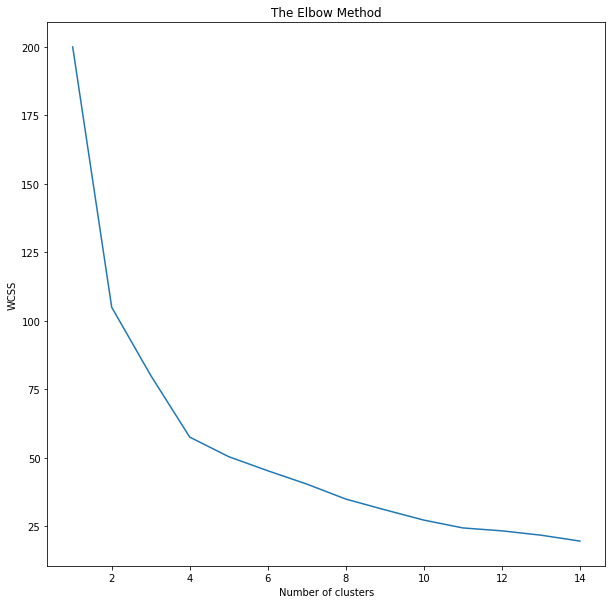

In [ ]:
#calculamos el numero de clusters necesarios con Kmeans representando los clusers frente a
# la medida de la variacion de las observaciones en cada cluster (wcss)
plt.figure(figsize=(10,10))
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10) # iniciamos el rs para evitar que sea estocastico y se pueda reproducir los valores
  kmeans.fit(cmst)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# como se observa en la figura, el cambio grande se realiza en los 4 clusters, 
# la mejora no es sustancial a partir de ahi 
# por lo tanto se ajusta el modelo para 4 clusters

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)
#realizamos la predicicon del modelo de clusterizacion 
y_kmeans = kmeans.fit_predict(cmst)
#obtenemos los centroides de cada cluster
centroides = kmeans.cluster_centers_

In [ ]:
#iniciamos el primer cluster con el numero 1
y_kmeans1 = y_kmeans+1
#creamos la lista de los clusters
cluster = list(y_kmeans1)
# añadimos el cluster al dataset original
crime_data['cluster'] = cluster


In [ ]:
#obtenemos la media de cada cluster para los datos de criminalidad
kmeans_clusters = pd.DataFrame(round(crime_data.groupby('cluster').mean(),1))

In [ ]:
#indicamos que estados hay en cada cluster
for i in range(1,5):
  print(crime_data[crime_data['cluster']==i])

            State  Murder  Assault  UrbanPop  Rape  cluster
6     Connecticut     3.3      110        77  11.1        1
7        Delaware     5.9      238        72  15.8        1
10         Hawaii     5.3       46        83  20.2        1
13        Indiana     7.2      113        65  21.0        1
15         Kansas     6.0      115        66  18.0        1
20  Massachusetts     4.4      149        85  16.3        1
29     New Jersey     7.4      159        89  18.8        1
34           Ohio     7.3      120        75  21.4        1
35       Oklahoma     6.6      151        68  20.0        1
36         Oregon     4.9      159        67  29.3        1
37   Pennsylvania     6.3      106        72  14.9        1
38   Rhode Island     3.4      174        87   8.3        1
43           Utah     3.2      120        80  22.9        1
45       Virginia     8.5      156        63  20.7        1
46     Washington     4.0      145        73  26.2        1
49        Wyoming     6.8      161      

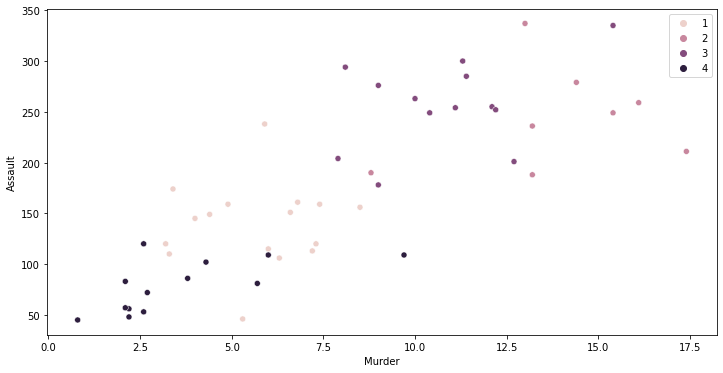

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_data['Murder'], y = crime_data['Assault'],hue=y_kmeans1)